In [1]:
# Checking the version of PYTHON; we only support > 3.5
import sys
if sys.version_info < (3,5):
    raise Exception('Please use Python version 3.5 or greater.')

import numpy as np

# Importing QISKit
from qiskit import QuantumCircuit, QuantumProgram
import Qconfig

# Import basic plotting tools
from qiskit.tools.visualization import plot_histogram

#custom
import drawcircuit as dc

# Quantum program setup 
Q_program = QuantumProgram()
Q_program.set_api(Qconfig.APItoken, Qconfig.config['url']) # set the APIToken and API url

In [2]:
# Creating registers
q = Q_program.create_quantum_register('q', 3)
c0 = Q_program.create_classical_register('c0', 1)
c1 = Q_program.create_classical_register('c1', 1)
c2 = Q_program.create_classical_register('c2', 1)

# Quantum circuit to make the shared entangled state 
teleport = Q_program.create_circuit('teleport', [q], [c0,c1,c2])
teleport.h(q[1])
teleport.cx(q[1], q[2])

In [3]:
teleport.ry(np.pi/4,q[0])

In [4]:
teleport.cx(q[0], q[1])
teleport.h(q[0])
teleport.barrier()

In [5]:
teleport.measure(q[0], c0[0])
teleport.measure(q[1], c1[0])

circuits = ['teleport']
print(Q_program.get_qasms(circuits)[0])

OPENQASM 2.0;
include "qelib1.inc";
qreg q[3];
creg c0[1];
creg c1[1];
creg c2[1];
h q[1];
cx q[1],q[2];
ry(0.785398163397448) q[0];
cx q[0],q[1];
h q[0];
barrier q[0],q[1],q[2];
measure q[0] -> c0[0];
measure q[1] -> c1[0];



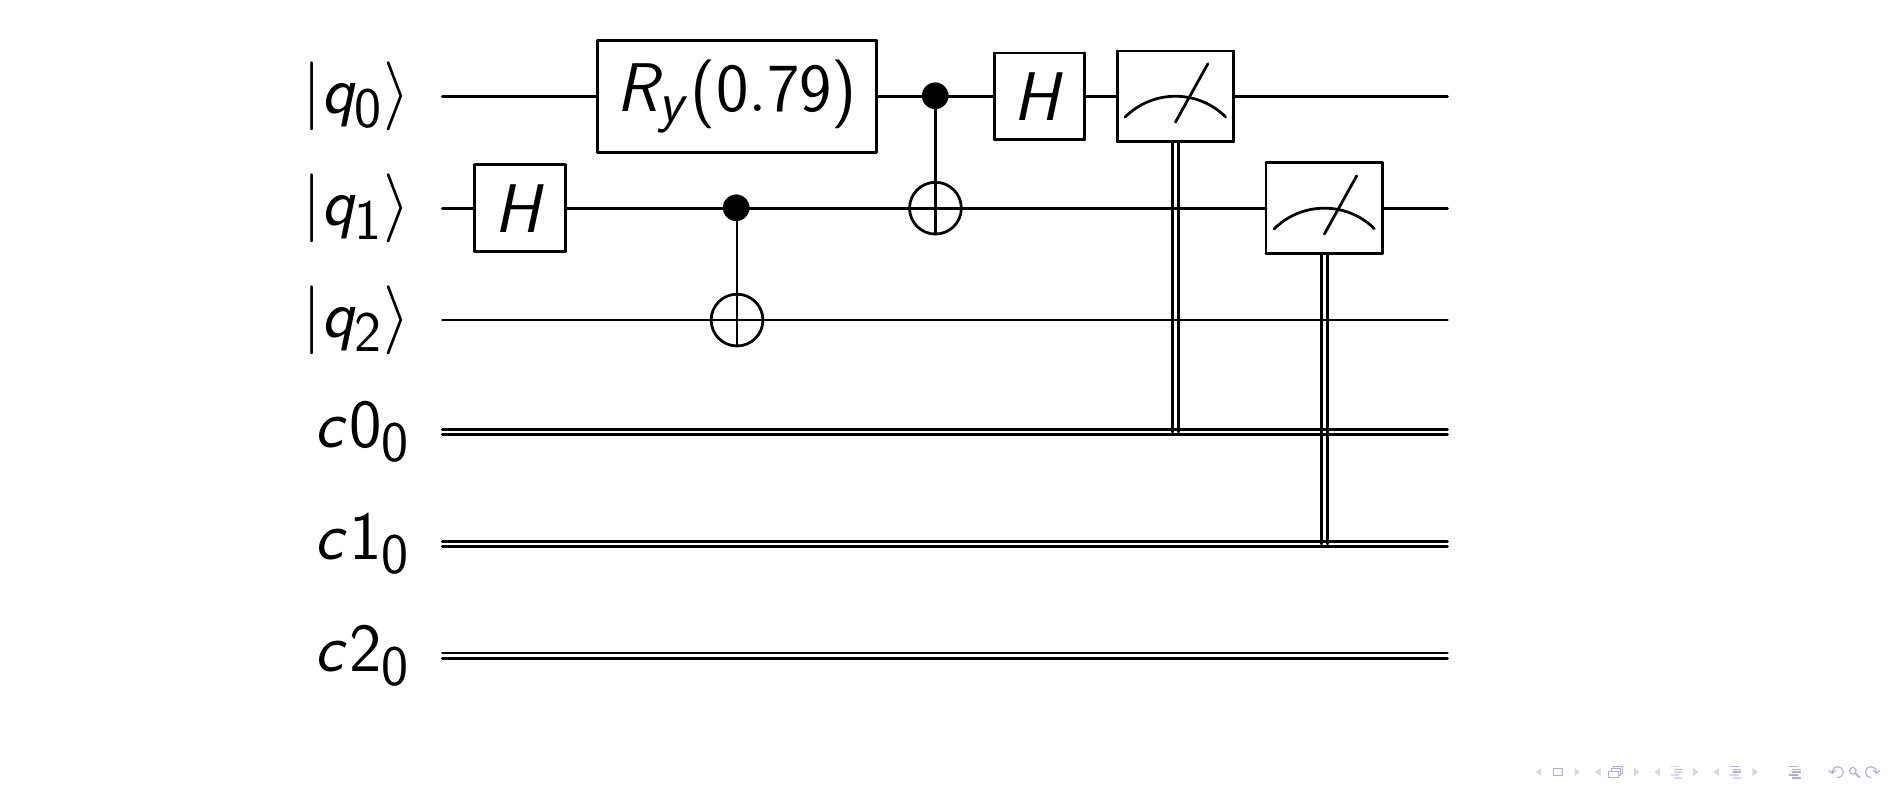

In [6]:
dc.drawCircuit(teleport)